<a href="https://colab.research.google.com/github/r-prateek/Indian-Currency-Notes-Classifier/blob/main/Currency_Resnet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset from Kaggle**

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d vishalmane109/indian-currency-note-images-dataset-2020
! unzip indian-currency-note-images-dataset-2020.zip -d dataset

#**Import required libraries**


Libraries used:
```
tensorflow
matplotlib
```

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

# **Data Augmentation**

In [8]:
train_path = "/content/dataset/Indian currency dataset v1/training"
test_path = "/content/dataset/Indian currency dataset v1/validation"

In [37]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 5,
    #zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    #brightness_range = (3,8)
)

In [38]:
train_data = datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865
)

Found 3566 images belonging to 8 classes.


In [39]:
test_data = datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865
)

Found 345 images belonging to 8 classes.


# **Using pretrained model Resnet50V2**

* Using model trained on *imagenet* dataset
* Resizing input shape to 50 x 50

In [41]:
ptm = tf.keras.applications.MobileNetV2( 
    include_top = False,
    weights = 'imagenet',
    input_shape = (100, 100, 3)
)

In [ ]:
ptm.trainable = False 
ptm.summary()

# **Creating model required**

Features of the model:

* Model has pretrained model for feature extraction
* Uses GlobalMaxPooling2D
* Artificial Deep Neural Network uses 3 Dense hidden layers with activations ReLu, and an output layer with activation 'Softmax'


In [50]:
model = tf.keras.Sequential()

In [51]:
model.add(ptm)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1311744   
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 8200      
Total params: 3,577,928
Trainable params: 1,319,944
Non-trainable params: 2,257,984
_________________________________________________________________


> Using *Adam* as the optimizer and loss fucnction as categorical CrossEntropy

In [53]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

> Training the model with validation data, for 40 epochs

In [54]:
history = model.fit(train_data, validation_data=test_data, epochs = 20)

Epoch 1/20
112/112 [==============================] - ETA: 0s - loss: 1.8608 - accuracy: 0.3915

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


112/112 [==============================] - 274s 2s/step - loss: 1.8572 - accuracy: 0.3925 - val_loss: 0.9152 - val_accuracy: 0.6696
Epoch 2/20
112/112 [==============================] - 267s 2s/step - loss: 1.1074 - accuracy: 0.6119 - val_loss: 0.7964 - val_accuracy: 0.7043
Epoch 3/20
112/112 [==============================] - 268s 2s/step - loss: 0.9249 - accuracy: 0.6866 - val_loss: 0.7036 - val_accuracy: 0.7565
Epoch 4/20
112/112 [==============================] - 268s 2s/step - loss: 0.8703 - accuracy: 0.6782 - val_loss: 0.6664 - val_accuracy: 0.7797
Epoch 5/20
112/112 [==============================] - 270s 2s/step - loss: 0.7909 - accuracy: 0.7142 - val_loss: 0.7487 - val_accuracy: 0.7246
Epoch 6/20
112/112 [==============================] - 276s 2s/step - loss: 0.7475 - accuracy: 0.7294 - val_loss: 0.6373 - val_accuracy: 0.7826
Epoch 7/20
112/112 [==============================] - 274s 2s/step - loss: 0.7135 - accuracy: 0.7411 - val_loss: 0.5472 - val_accuracy: 0.8116
Epoch 8/20

# **Plotting Graphs**

> Using ```matplotlib.pyplot```
* Plotting graph of Accuracy vs Validation Accuracy for each epoch.
* Plotting graph of Loss vs Validation Loss for each epoch

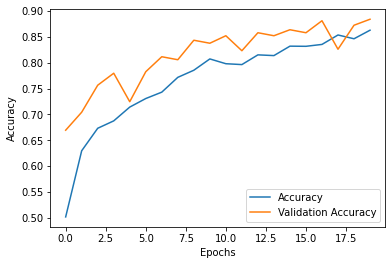

In [55]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "lower right")

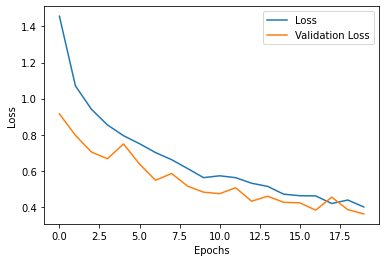

In [56]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")